# Exercise 1

Setting up common utilities

In [52]:
%config InlineBackend.figure_format='retina'
%matplotlib inline

import numpy as np
np.random.seed(123)
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (8, 8)
plt.rcParams["font.size"] = 14
from sklearn.utils import check_random_state

## Question 1

Generate a 2D dataset with two labels ('red' and 'blue') and plot it

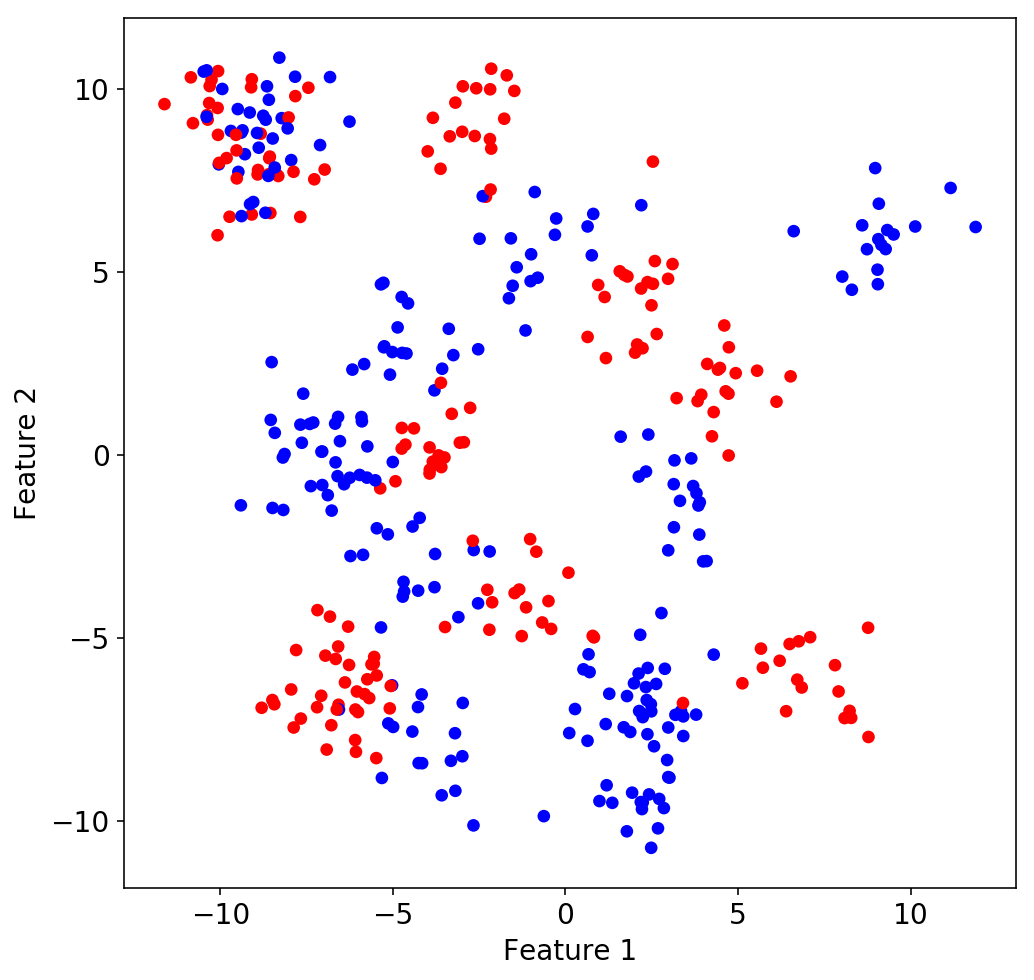

In [53]:
from sklearn.datasets import make_blobs
from sklearn.neighbors import KNeighborsClassifier

labels = ["b", "r"]
X, y = make_blobs(n_samples=400, centers=23, random_state=42)
y = np.take(labels, (y < 10))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Split the dataset in two halves for training and testing. The splitting is made randomly because, in general, data may be "ordered" and this could imply statistical differences between the first half and the second half. 

In [54]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)

Train the KNeighborsClassifier on the training sample, and then compare the performance on training and testing samples. Starting with the case of 3 neighbors.

In [55]:
from sklearn.neighbors import KNeighborsClassifier

clf = KNeighborsClassifier(n_neighbors=3)
clf.fit(X_train, y_train)
train_score = clf.score(X_train, y_train)
test_score = clf.score(X_test, y_test)
print('Score of classifier on training sample: ', train_score )
print('Score of classifier on testing sample: ', test_score )

Score of classifier on training sample:  0.91
Score of classifier on testing sample:  0.865


Study the scores on training and testing samples as a function of the splitting proportion. For each proportion, compute the score several times and take the average.

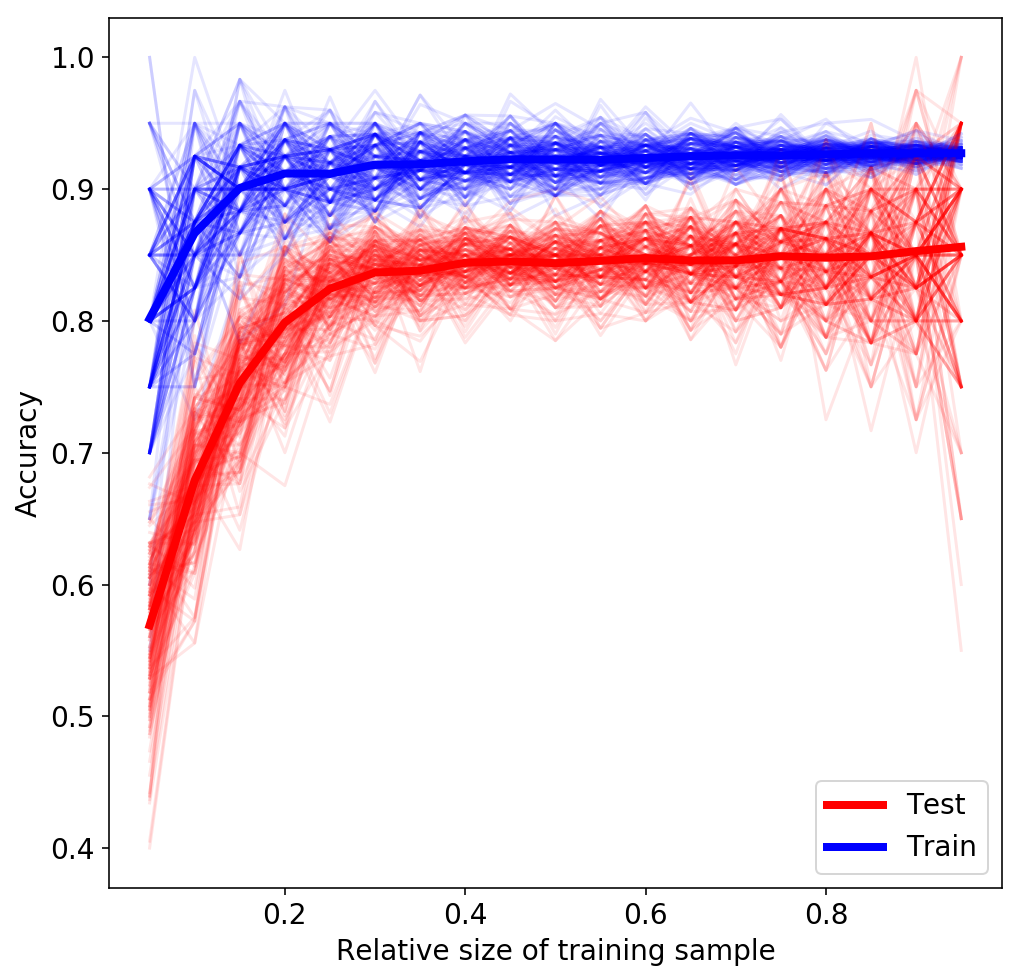

In [56]:
tr_size = np.arange(0.05,1.0,0.05)
accuracies_test = []
accuracies_train = []

for n in range(200):
    train_scores = []
    test_scores = []
    for sz in tr_size:
        X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=sz)
        clf.fit(X_train, y_train)
        train_scores.append( clf.score(X_train, y_train) )
        test_scores.append( clf.score(X_test, y_test) )
    
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(tr_size, train_scores, c='b', alpha=0.1)
    plt.plot(tr_size, test_scores, c='r', alpha=0.1)

plt.plot(tr_size, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(tr_size, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('Relative size of training sample')
plt.ylabel('Accuracy')
plt.legend(loc='best');

The accuracy on the training set is always better than the accuracy on the testing sample. Increasing the training set size clearly improves the accuracy (i.e. reduces the bias). However, reducing too much the testing sample size introduces too many fluctuations in the measured accuracy, which means that we may not have a good estimate of the variance of the classifier. So, a good compromise could be to choose the region where all the testing curves are "shrinked" in the band of smallest width, which means between 0.5 and 0.7, roughly. 

Plot the classifier accuracy as a function of the number of neighbors

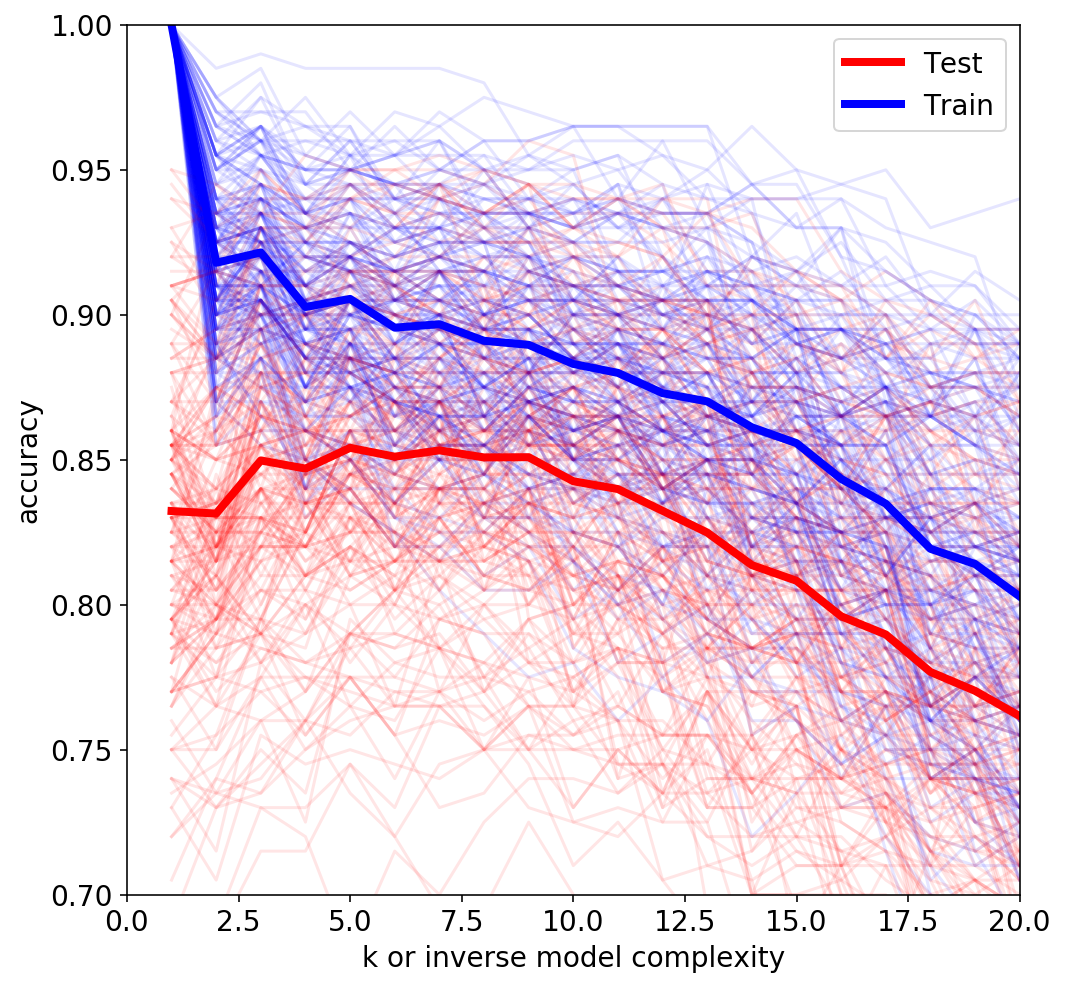

In [57]:
accuracies_test = []
accuracies_train = []
ks = np.arange(1, 21, 1)

for n in range(200):
    X, y = make_blobs(n_samples=400, centers=23, random_state=42+n)
    y = np.take(labels, (y < 10))
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    train_scores = []
    test_scores = []
    for k in ks:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        train_scores.append(clf.score(X_train, y_train))
        test_scores.append(clf.score(X_test, y_test))
        
    accuracies_test.append(test_scores)
    accuracies_train.append(train_scores)
    
    plt.plot(ks, train_scores, c='b', alpha=0.1)
    plt.plot(ks, test_scores, c='r', alpha=0.1)
    
plt.plot(ks, np.array(accuracies_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(ks, np.array(accuracies_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel('k or inverse model complexity')
plt.ylabel('accuracy')
plt.legend(loc='best')
plt.xlim((0, max(ks)))
plt.ylim((0.7, 1.));

The performance at low k (i.e. high complexity) is very high, even perfect for the training sample. However, the variance (dicrepancy between training and testing) is very high because the classifier is basically trained to describe the training set with poor predictions on examples outside the training set. The best working point could be around k=6, where the variance is reduced and the bias is not too low at the same time. A very simple model (high k) introduces a too high bias (very low accuracy).

## Question 2

Create and plot dataset.

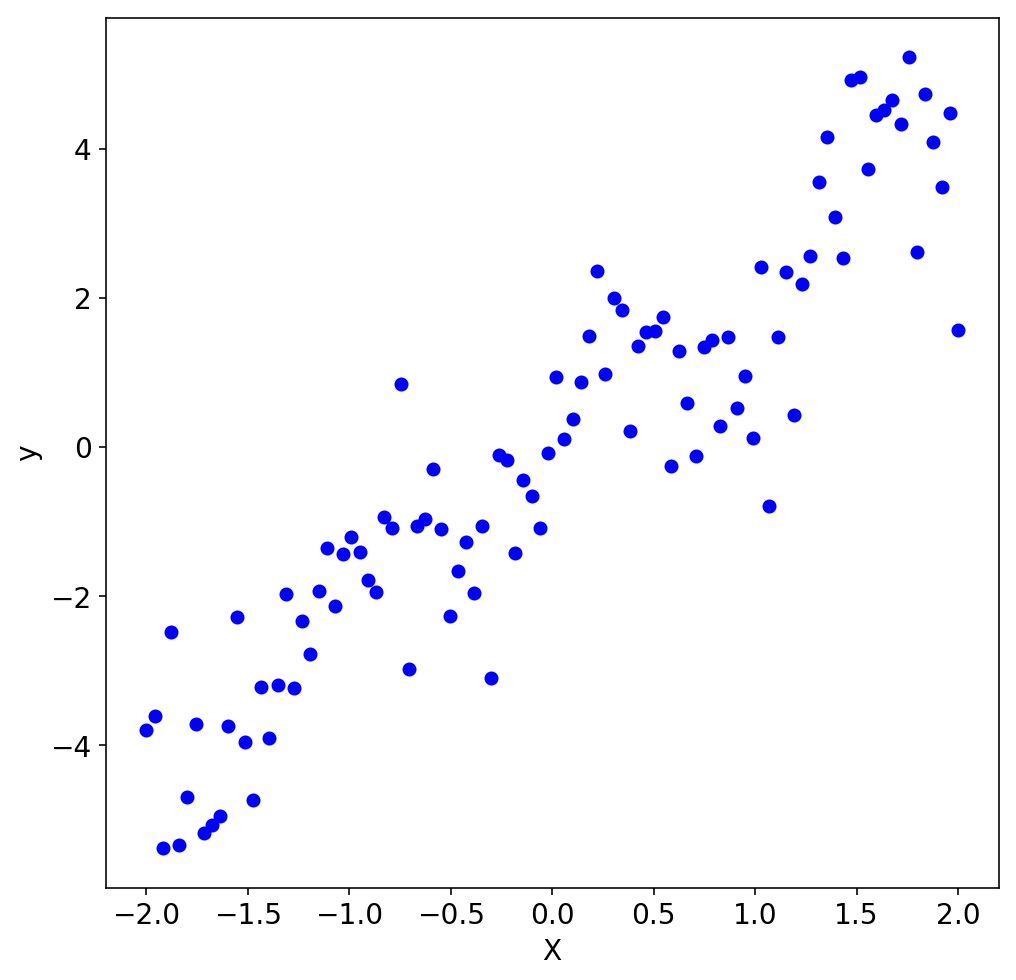

In [84]:
def make_regression(n_samples=100, noise_level=0.8, random_state=2):
    rng = check_random_state(random_state)
    X = np.linspace(-2, 2, n_samples)
    y = 2 * X + np.sin(5 * X) + rng.randn(n_samples) * noise_level
    
    return X.reshape(-1, 1), y

X, y = make_regression()
plt.plot(X, y, 'ob')
plt.xlabel("X")
plt.ylabel("y");

Create training and testing datasets, then fit a kNearestNeighbor regressor for different values of k.

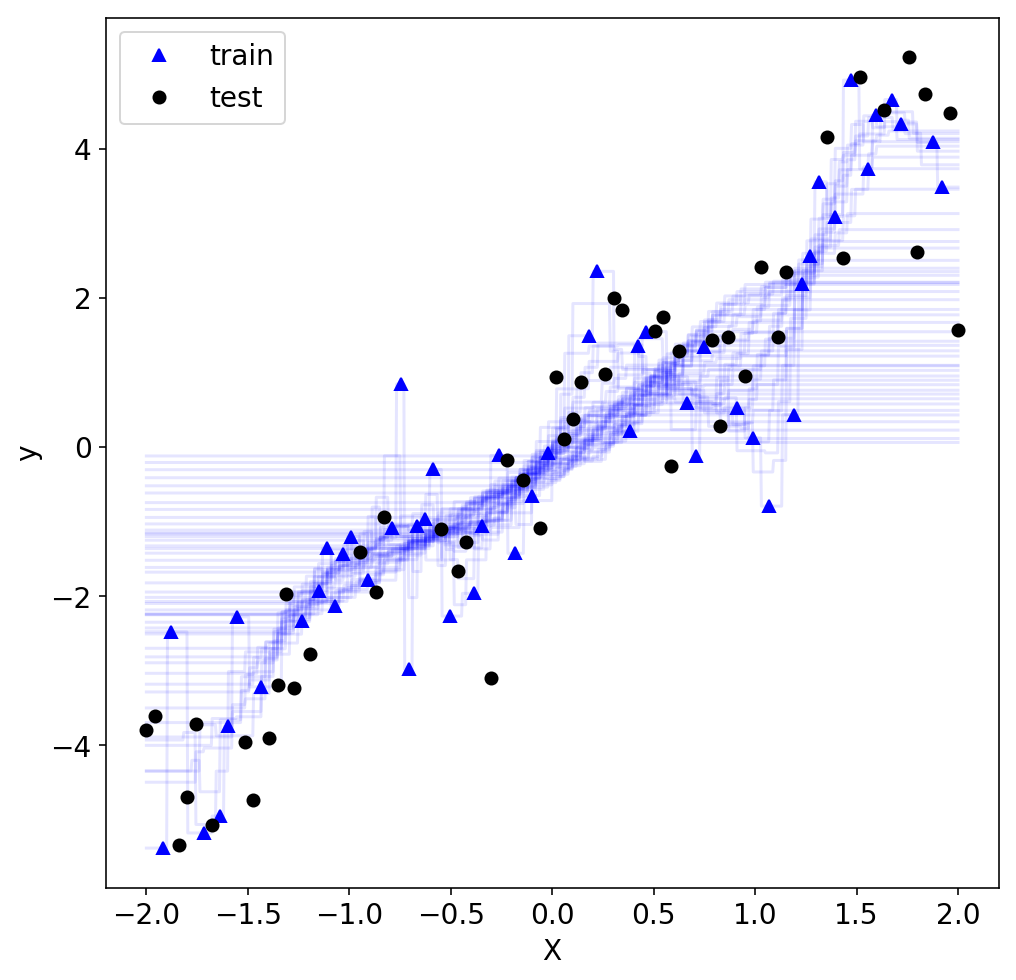

In [85]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error 

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.5)
line = np.linspace(-2, 2, 1000).reshape(-1, 1)
nneigh = np.arange(1,y_train.size,1)
err_train = []
err_test = []

for nn in nneigh:
    rgr = KNeighborsRegressor(n_neighbors=nn)
    rgr.fit(X_train, y_train)
    err_train.append(mean_squared_error(y_train, rgr.predict(X_train)))
    err_test.append(mean_squared_error(y_test, rgr.predict(X_test)))
    plt.plot(line, rgr.predict(line), '-b', alpha=0.1)
    
plt.plot(X_train, y_train, '^b', label='train')
plt.plot(X_test, y_test, 'ok', label='test')
plt.xlabel("X")
plt.ylabel("y")
plt.legend(loc='best');

Plot mean squared error as a function of k for training and testing samples

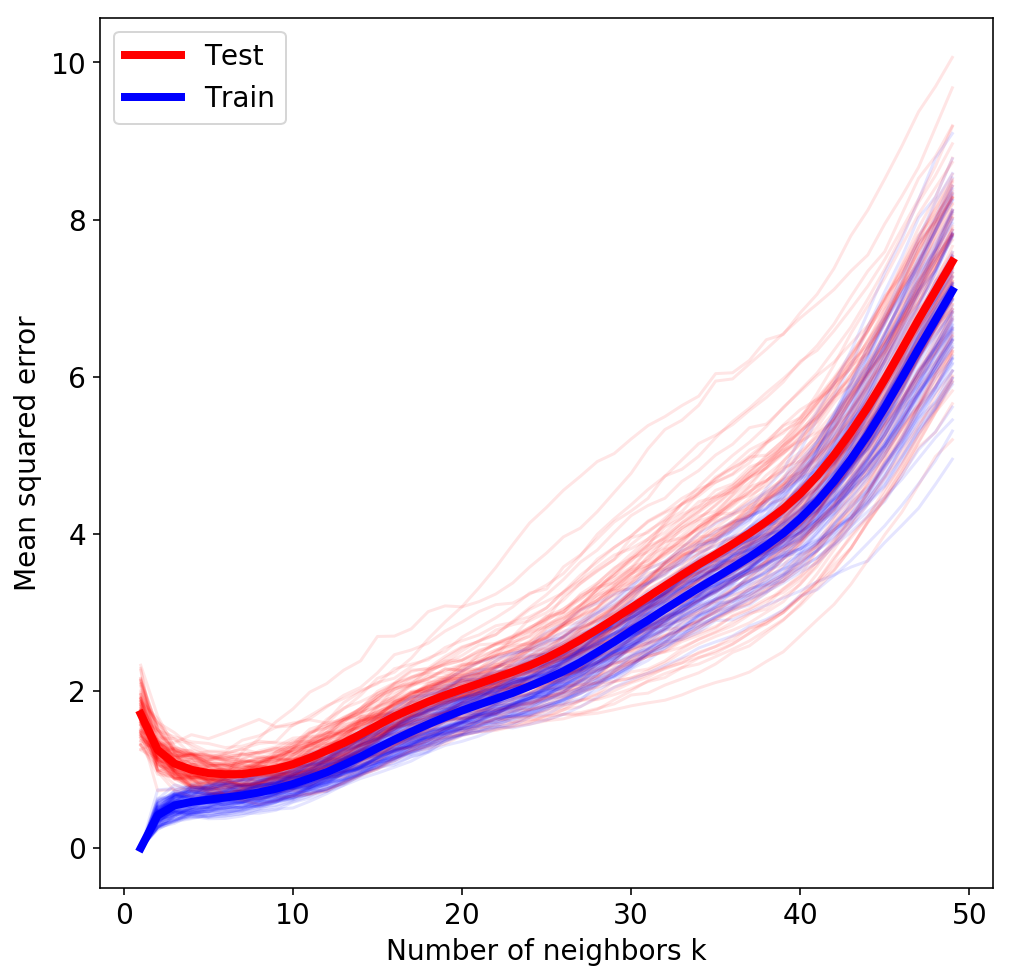

In [86]:
errs_train = []
errs_test = []

for n in range(0,100):
    
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    err_train = []
    err_test = []
    
    for nn in nneigh:
        rgr = KNeighborsRegressor(n_neighbors=nn)
        rgr.fit(X_train, y_train)
        err_train.append(mean_squared_error(y_train, rgr.predict(X_train)))
        err_test.append(mean_squared_error(y_test, rgr.predict(X_test)))
       
    errs_test.append(err_test)
    errs_train.append(err_train)
    
    plt.plot(nneigh, err_train, c='b', alpha=0.1)
    plt.plot(nneigh, err_test, c='r', alpha=0.1)
    
plt.plot(nneigh, np.array(errs_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(nneigh, np.array(errs_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel("Number of neighbors k")
plt.ylabel("Mean squared error")
plt.legend(loc='best');

The best choice for k is around k=5. In fact, for smaller k the performance is better on the training set (low bias), but the error on the testing set is much higher (high variance). For higher k, the agreement between training and testing sets improves (low variance), but the error itself becomes higher and higher (high bias). The plateau which appears between k=5 and k=15 means that, in this range of parameter, the regression model is stable, in the sense that small variations of the hyper-parameter k introduce only high-order effects in the performance.

## Question 3 

A linear regression model is used to solve a regression problem where the real-valued output y is assumed to be a linear function of the input X. Once the model is fitted to a training set, it can be used to make predictions on unseen data.

A logistic regression model, despite its name ("regression"), is actually used to solve a binary classification model where the output $y$ can take only two discrete values. The logistic model (a sigmoid function) maps $X$ into the real $[0,1]$ interval, and this mapped value can be directly interpreted as the probability $P(y=1|X,\vec\beta)$ that $y=1$ for some data $X$ and some fitted parameters $\vec\beta$.   

Create and plot dataset. Draw a naive guestimate for the decision boundary. This guess is just the function $y=x$, the simplest model that, by eye, discriminates between the two classes.

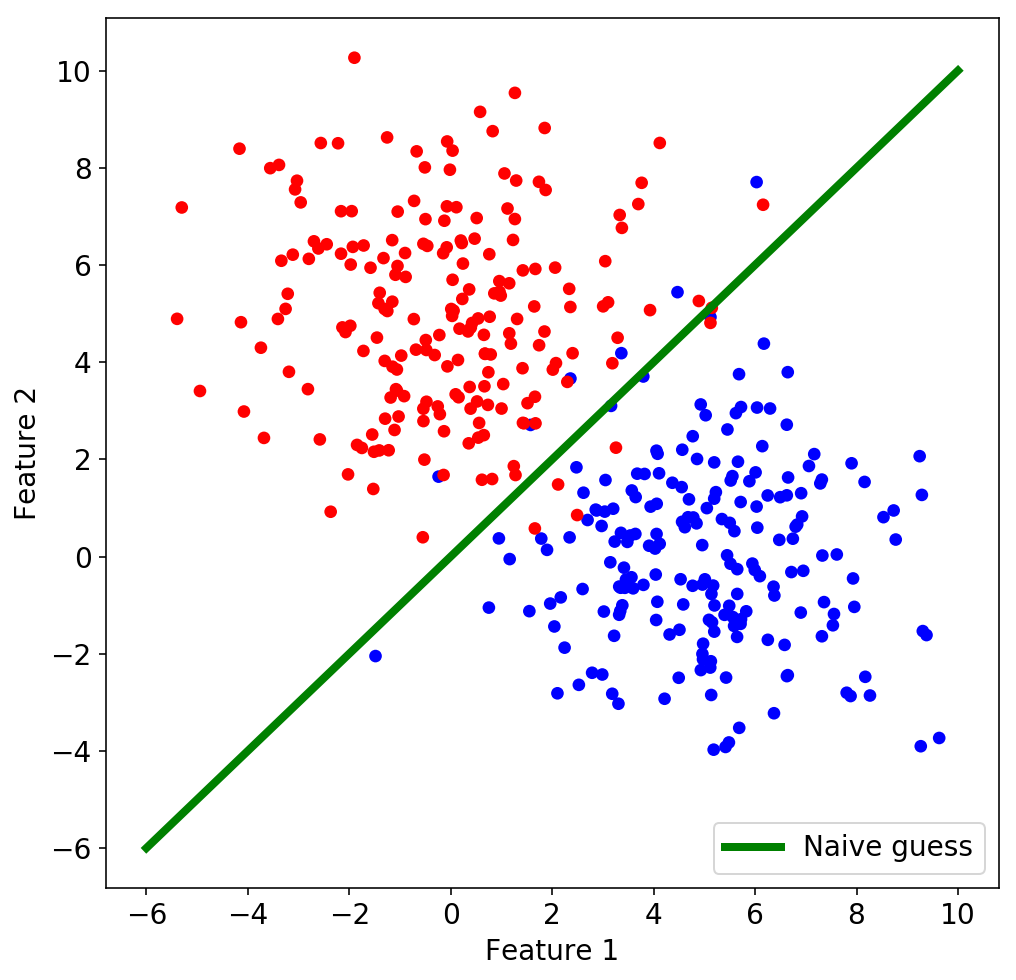

In [141]:
from sklearn.linear_model import LogisticRegression

def make_two_blobs(n_samples=400, cluster_std=2., random_state=42):
    rng = check_random_state(random_state)
    X = rng.multivariate_normal([5,0], [[cluster_std**2, 0], [0., cluster_std**2]],
                                size=n_samples//2)
    
    X2 = rng.multivariate_normal([0, 5.], [[cluster_std**2, 0], [0., cluster_std**2]],
                                 size=n_samples//2)
    X = np.vstack((X, X2))
    return X, np.hstack((np.ones(n_samples//2), np.zeros(n_samples//2)))

line = np.linspace(-6, 10, 1000)
guess = line

X, y = make_two_blobs()
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(line, line, label='Naive guess', c='g', lw=4)
plt.legend(loc='best');

Fit data using logistic regression, get fitted parameters and plot decision boundary. The boundary corresponds to the line where $P(y=1|X,\vec\beta)=0.5$.

Fitted coefficients:
-1.41109596973
1.2966318685
Fitted intercept:
0.208743409989


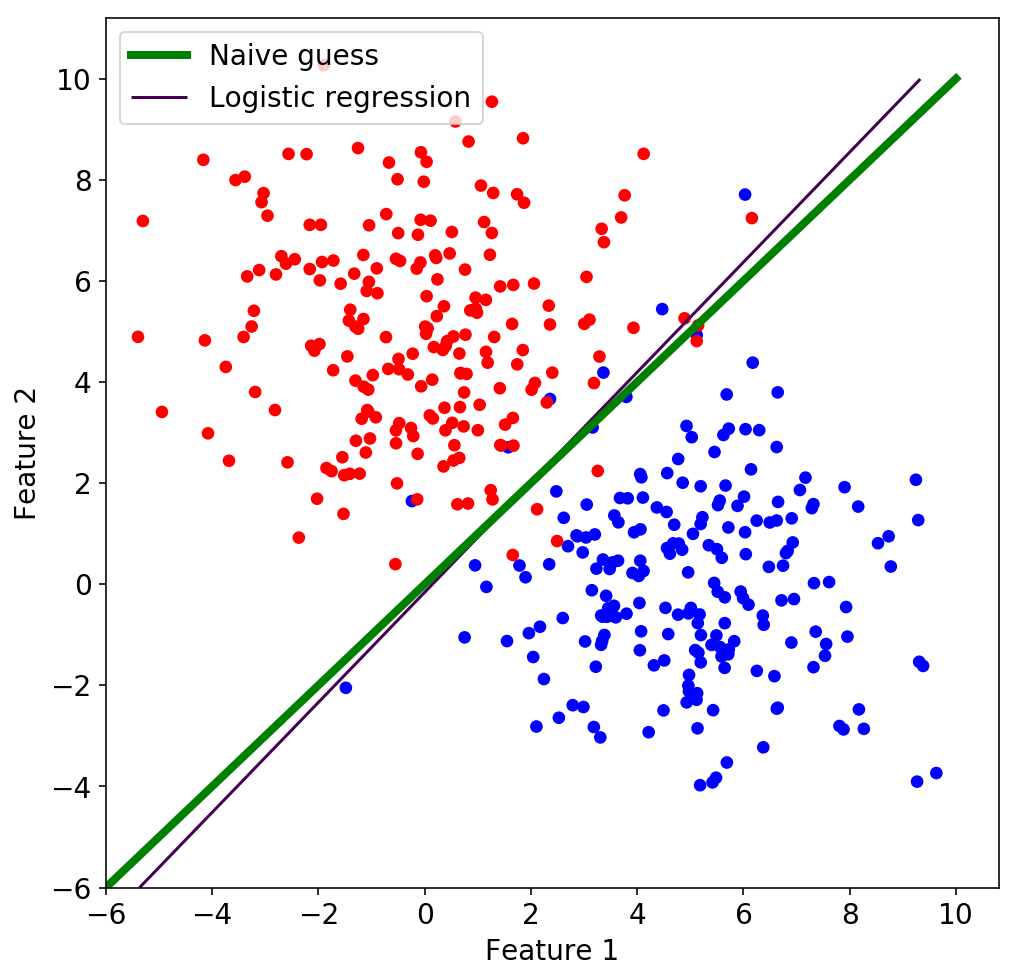

In [142]:
lrg = LogisticRegression()
lrg.fit(X,y)

coeffs = lrg.coef_
intercept = lrg.intercept_
print('Fitted coefficients:')
for c in coeffs[0]:
    print(c)
print('Fitted intercept:')
for i in intercept:
    print(i)
    
xx, yy = np.mgrid[-6:10:.01, -6:10:.01]
grid = np.c_[xx.ravel(), yy.ravel()]
probs = lrg.predict_proba(grid)[:, 1].reshape(xx.shape)

cnt = plt.contour(xx, yy, probs, levels=[.5])
cnt.collections[0].set_label('Logistic regression')
plt.scatter(X[:, 0], X[:, 1], c=y, lw=0, s=40)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.plot(line, line, label='Naive guess', c='g', lw=4)
plt.legend(loc='best');

Plot decision boundary.

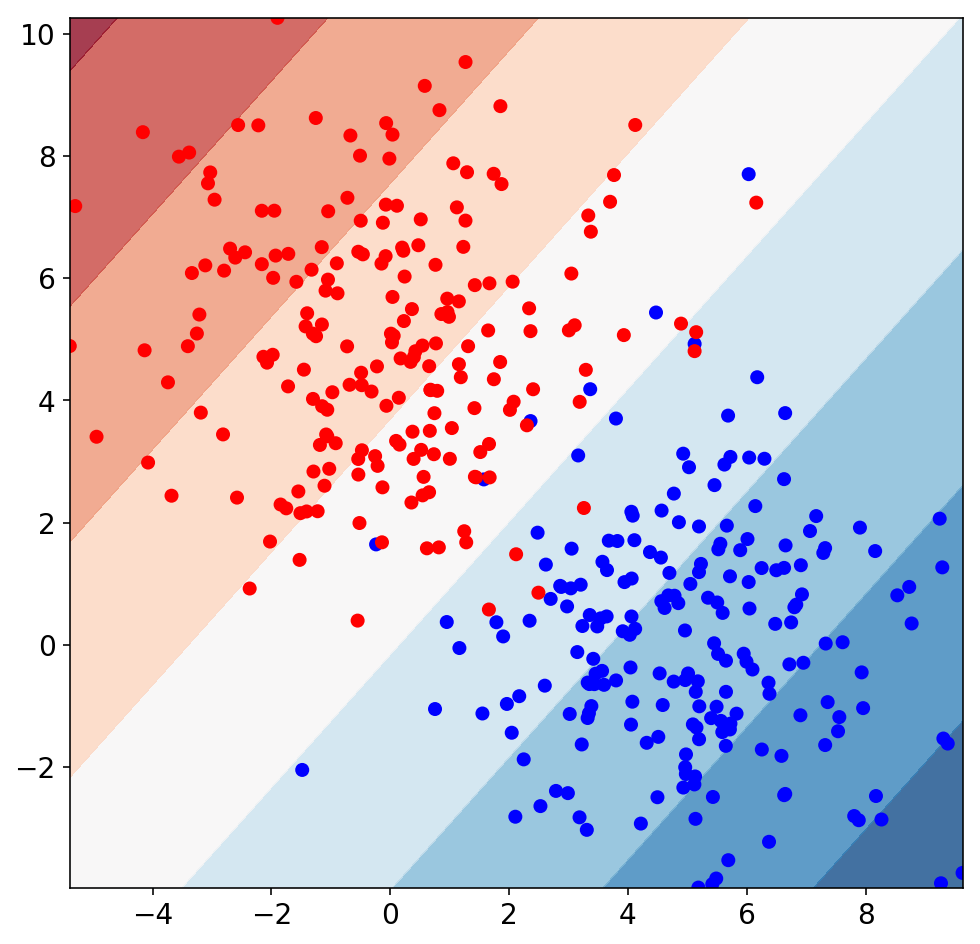

In [143]:
def plot_surface(clf, X, y, n_steps=250, subplot=None, show=True, ylim=None, xlim=None):
    if subplot is None:
        fig = plt.figure()
    else:
        plt.subplot(*subplot)

    if xlim is None:
        xlim = X[:, 0].min(), X[:, 0].max()
    if ylim is None:
        ylim = X[:, 1].min(), X[:, 1].max()
    xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], n_steps),
                         np.linspace(ylim[0], ylim[1], n_steps))

    if hasattr(clf, "decision_function"):
        z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
    else:
        z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]

    z = z.reshape(xx.shape)
    plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)
    plt.scatter(X[:, 0], X[:, 1], c=y)
    plt.xlim(*xlim)
    plt.ylim(*ylim)

    if show:
        plt.show()
        
plot_surface(lrg, X, y);

Create datasets with increasing noise and plot decision boundary for each case. The decision boundary tends to become a simple "rectangular" cut on one of the features (feature 1 in this case) in the limit of very high noise. This happens because the two blobs tends to be completely overlapped with high noise (not sure what to conclude from that...)

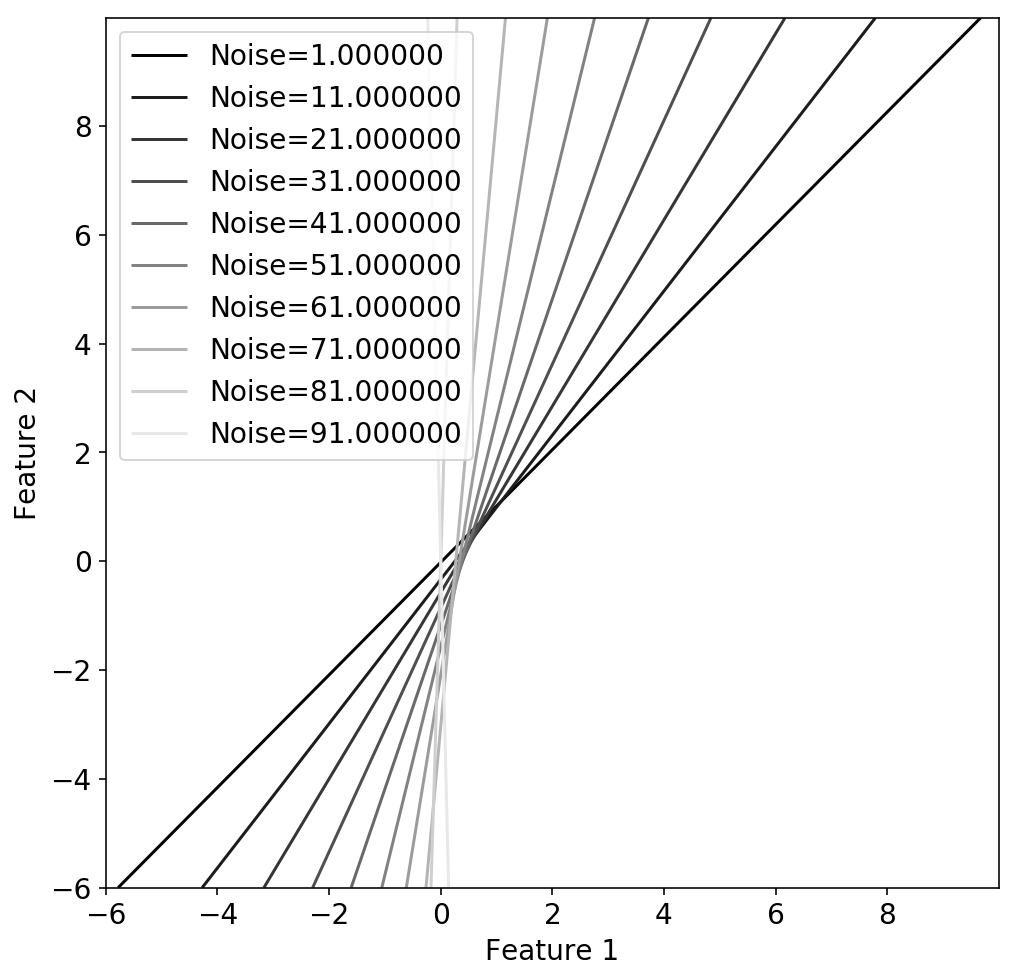

In [151]:
std_devs = np.arange(1., 100., 10.)

for std in std_devs:
    X, y = make_two_blobs(cluster_std=std, random_state=42)
    lrg = LogisticRegression()
    lrg.fit(X,y)
    
    xx, yy = np.mgrid[-6:10:.01, -6:10:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = lrg.predict_proba(grid)[:, 1].reshape(xx.shape)

    cnt = plt.contour(xx, yy, probs, levels=[.5], colors=str(std/100.))
    cnt.collections[0].set_label('Noise=%f' % (std))
    
plt.legend(loc='upper left')
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Study decision boundary for different random states.

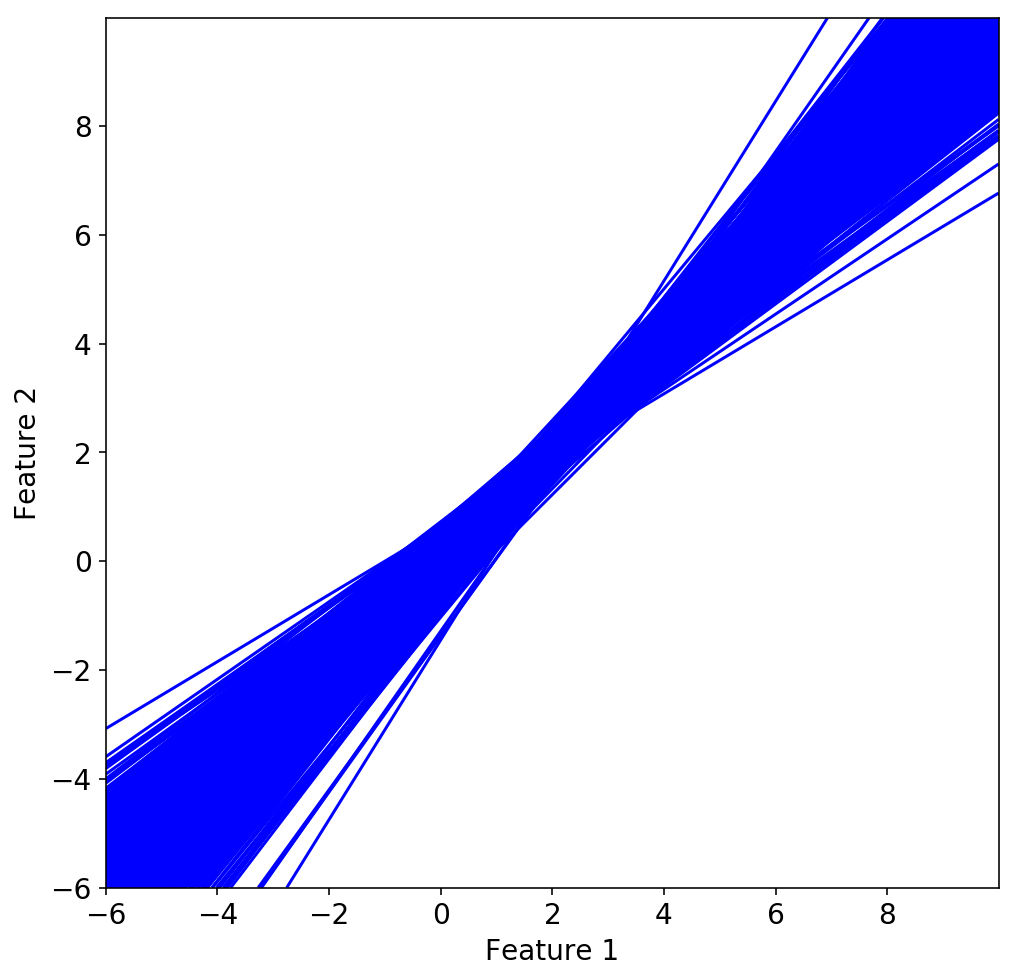

In [181]:
rnd_states = np.arange(1, 500, 1)

coeffs1=[]
coeffs2=[]
intercept=[]

for rnd in rnd_states:
    X, y = make_two_blobs(random_state=rnd)
    lrg = LogisticRegression()
    lrg.fit(X,y)
    
    coeffs1.append(lrg.coef_[0][0])
    coeffs2.append(lrg.coef_[0][1])
    intercept.append(lrg.intercept_[0])
    
    xx, yy = np.mgrid[-6:10:.01, -6:10:.01]
    grid = np.c_[xx.ravel(), yy.ravel()]
    probs = lrg.predict_proba(grid)[:, 1].reshape(xx.shape)

    cnt = plt.contour(xx, yy, probs, levels=[.5], colors='b')
    
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Study fitted parameters for different random states

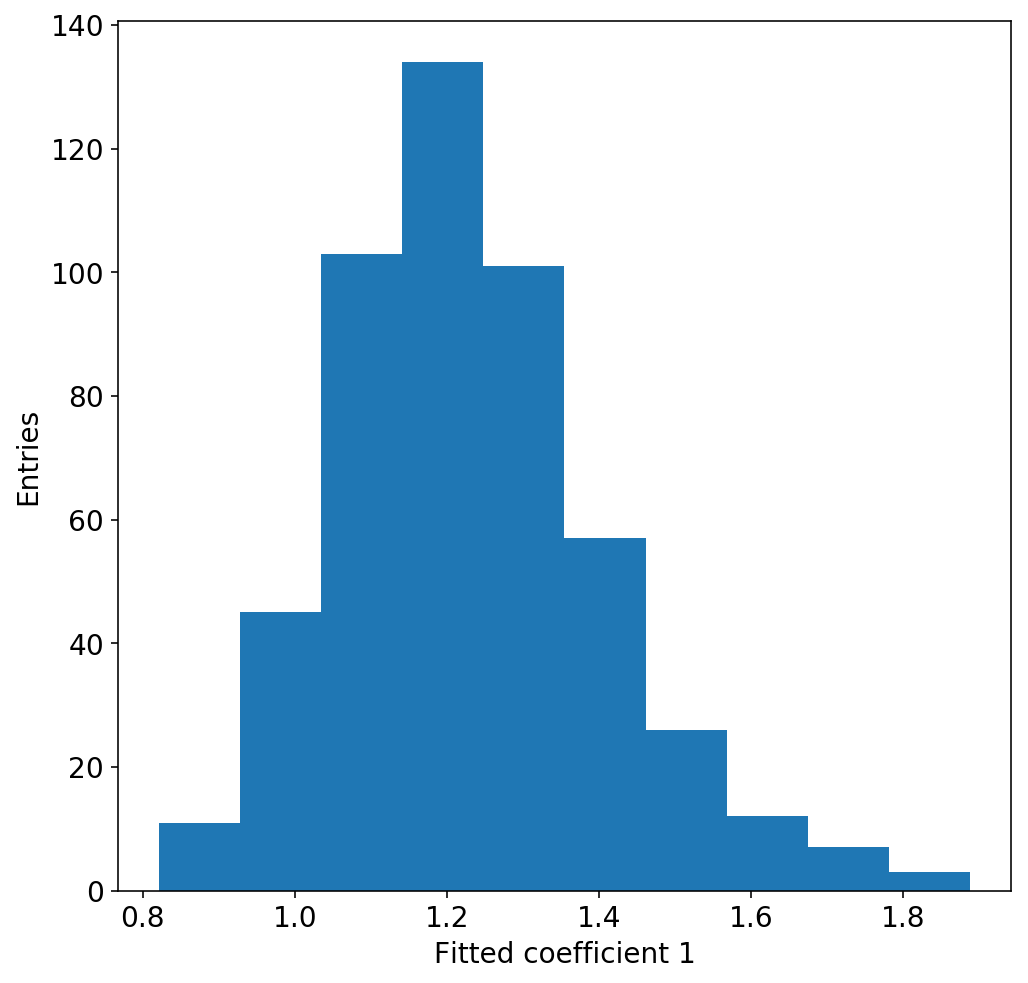

In [184]:
plt.hist(coeffs1)
plt.xlabel("Fitted coefficient 1")
plt.ylabel("Entries");

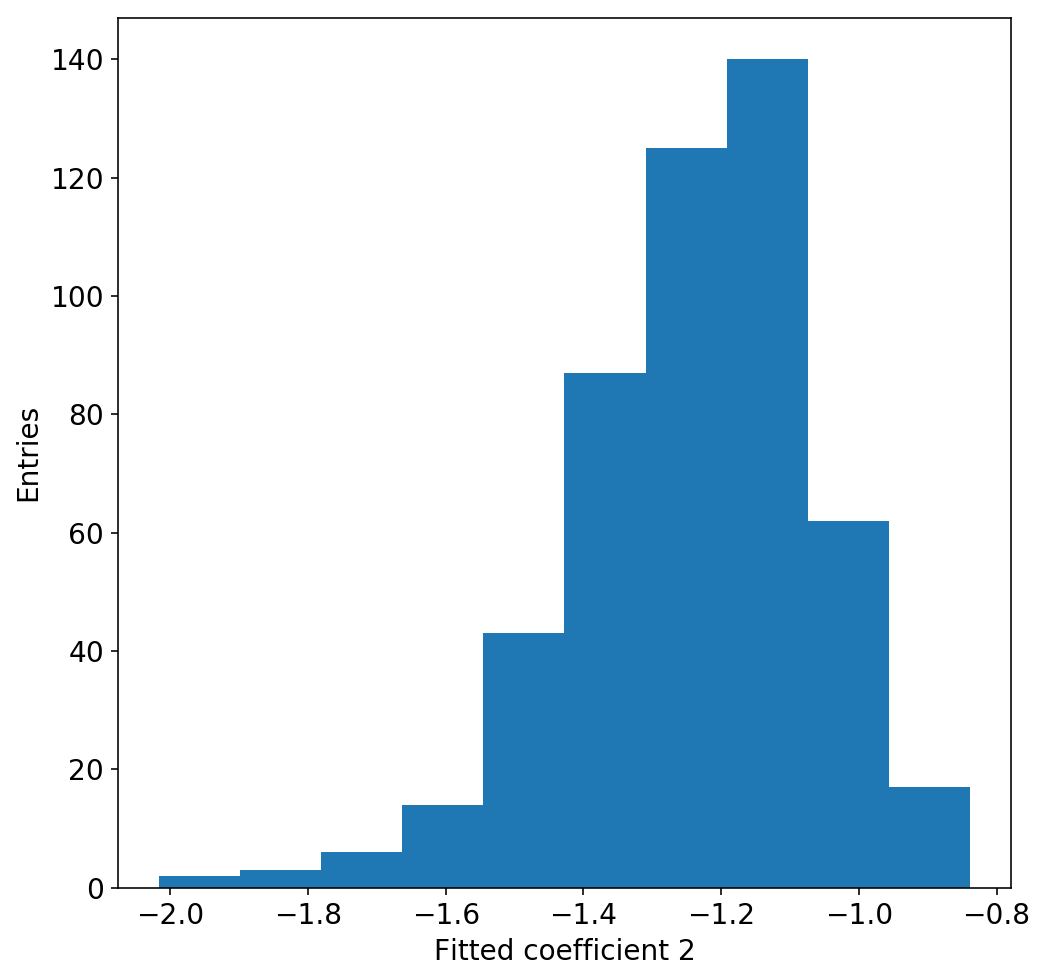

In [185]:
plt.hist(coeffs2);
plt.xlabel("Fitted coefficient 2")
plt.ylabel("Entries");

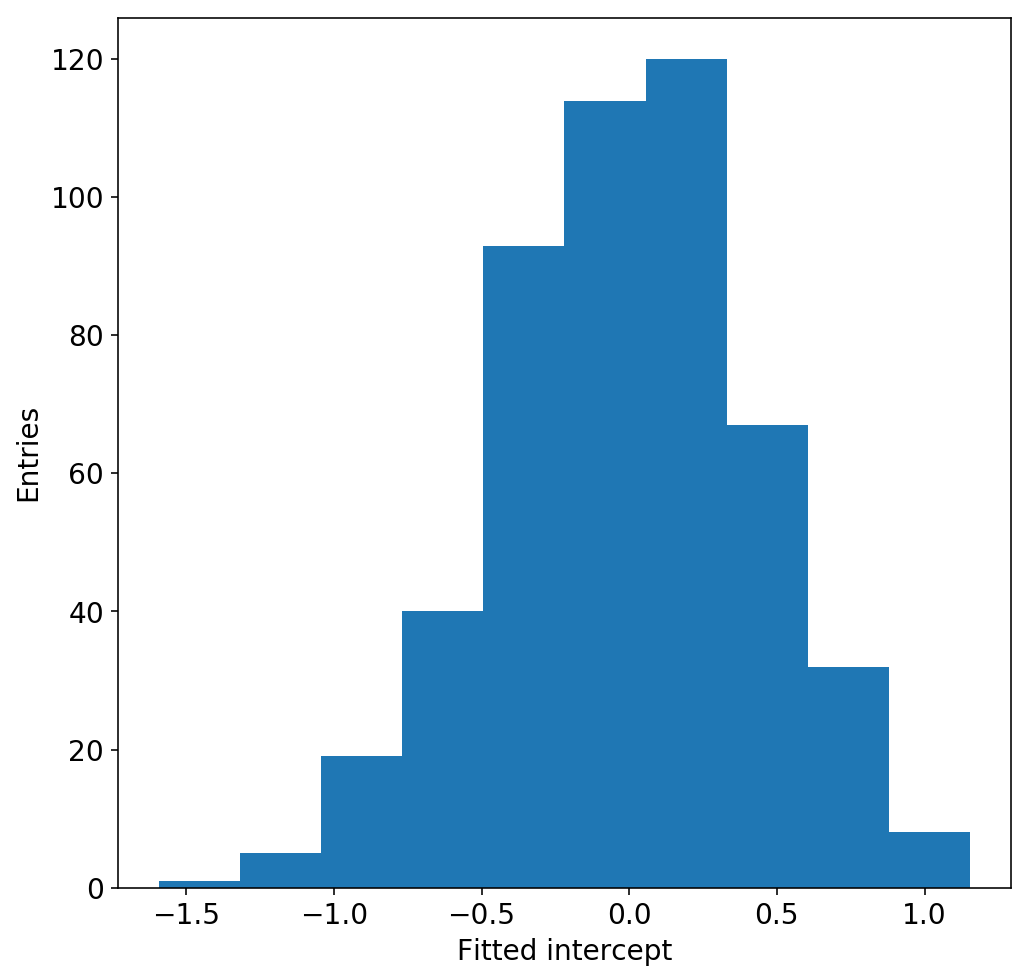

In [186]:
plt.hist(intercept);
plt.xlabel("Fitted intercept")
plt.ylabel("Entries");

## Question 4

Generate and plot data.

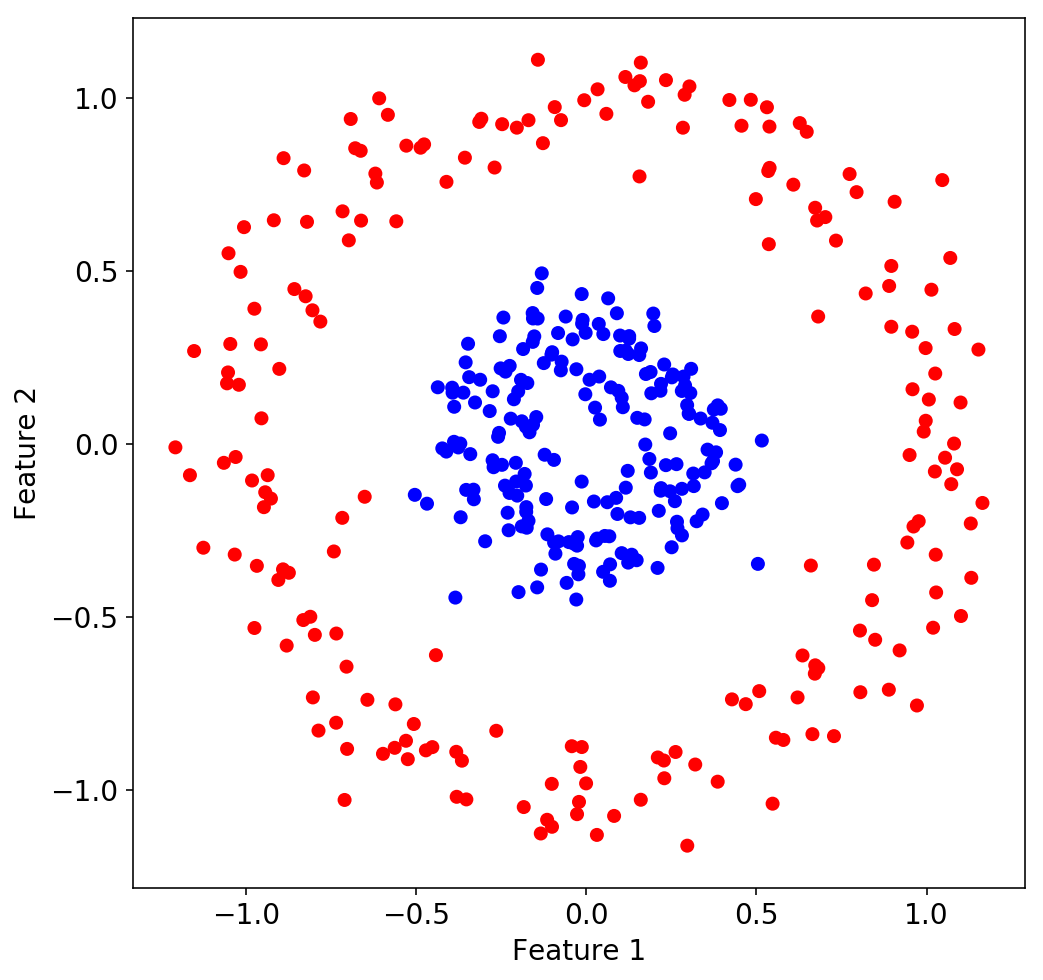

In [200]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.1)
labels = ['b', 'r']
y = np.take(labels, (y < 0.5))

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Perform logistic regression using a 2nd degree polynomial of the input features.

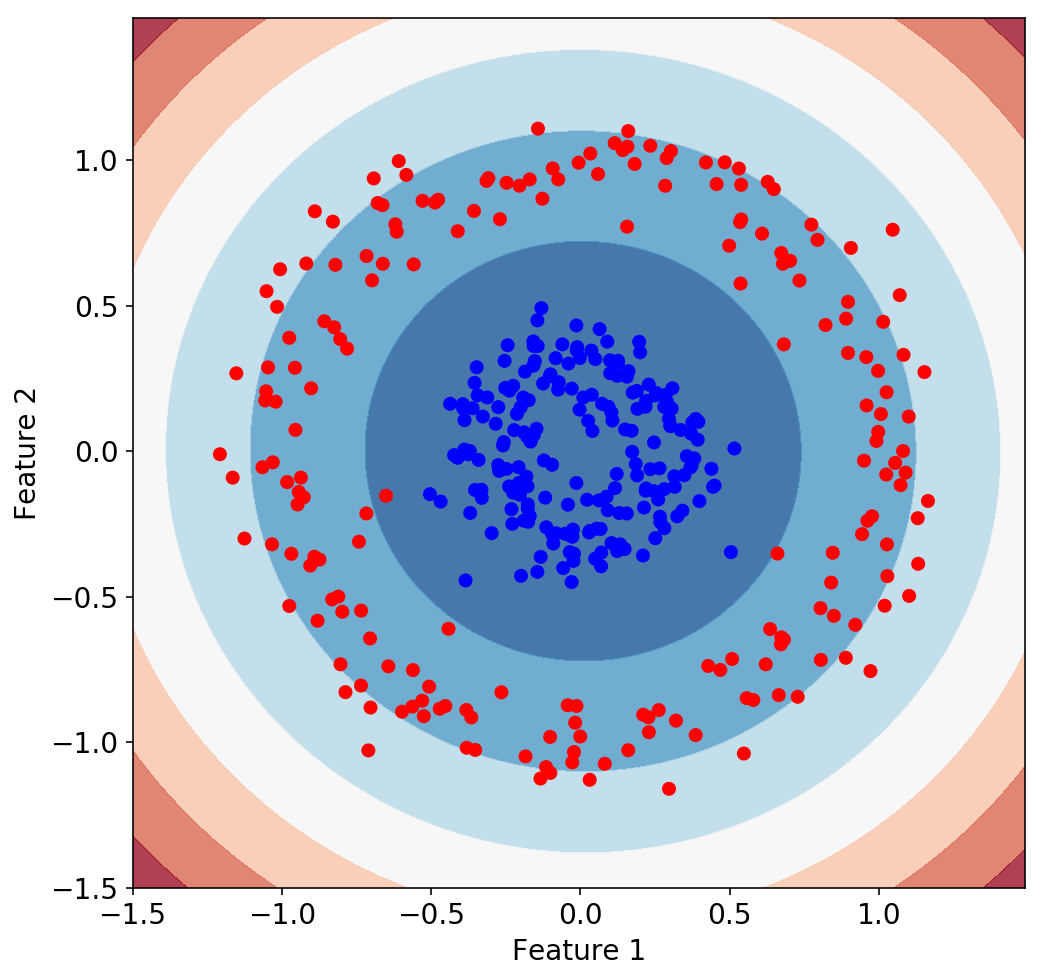

In [206]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures

lrg = Pipeline([('polynomial',PolynomialFeatures(degree=2)), ('logistic',LogisticRegression())])
lrg.fit(X,y)

xx, yy = np.meshgrid(np.arange(-1.5, 1.5, .01),
                         np.arange(-1.5, 1.5, .01))

z = lrg.decision_function(np.c_[xx.ravel(), yy.ravel()])
z = z.reshape(xx.shape)
plt.contourf(xx, yy, z, alpha=0.8, cmap=plt.cm.RdBu_r)

plt.scatter(X[:,0], X[:,1], c=y)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2");

Check performance as a function of complexity (i.e. polynomial degree). The plot shows that a second degree polynomial is the best choice, and that increasing the model complexity doesn't improve the score.

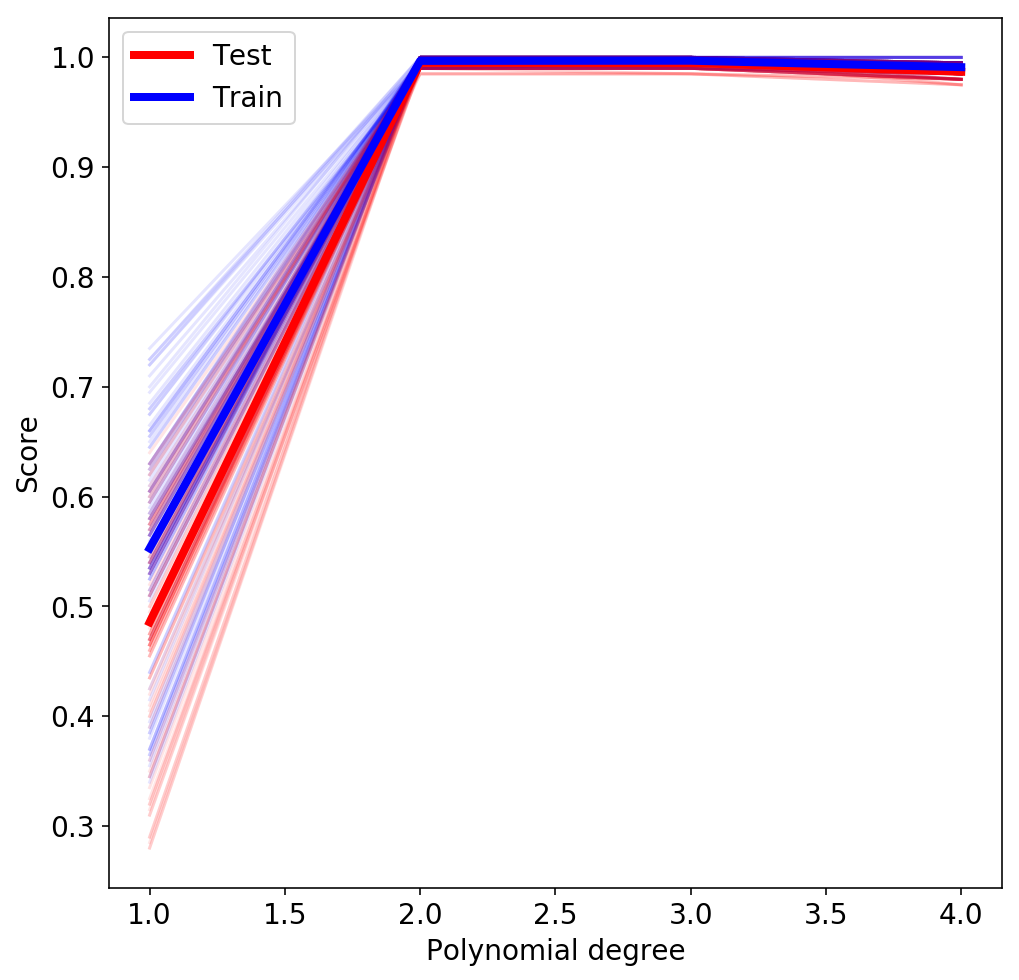

In [208]:
scores_train = []
scores_test = []

deg=np.arange(1,5)

for n in range(0,100):
    
    X_train,X_test, y_train,y_test = train_test_split(X, y, train_size=0.5)
    score_train = []
    score_test = []
    
    for d in deg:
        lrg = Pipeline([('polynomial',PolynomialFeatures(degree=d)), ('logistic',LogisticRegression())])
        lrg.fit(X_train,y_train)
        score_train.append(lrg.score(X_train,y_train))
        score_test.append(lrg.score(X_test,y_test))
       
    scores_test.append(score_test)
    scores_train.append(score_train)
    
    plt.plot(deg, score_train, c='b', alpha=0.1)
    plt.plot(deg, score_test, c='r', alpha=0.1)
    
plt.plot(deg, np.array(scores_test).mean(axis=0), label='Test', c='r', lw=4)
plt.plot(deg, np.array(scores_train).mean(axis=0), label='Train', c='b', lw=4)
plt.xlabel("Polynomial degree")
plt.ylabel("Score")
plt.legend(loc='best');